## "Exploring Diabetes Predictors in the Pima Community Through Machine Learning"

## Diabetes 



Diabetes mellitus (Type II Diabetes), is a chronic metabolic disorder characterized by elevated levels of blood glucose (blood sugar). This condition arises either due to insufficient production of insulin, ineffective utilization of insulin, or both. Insulin, a hormone produced by the pancreas, plays a crucial role in regulating blood sugar levels by facilitating the absorption of glucose into cells for energy or storage.

Diabetes has emerged as a significant global health concern, with its prevalence steadily increasing over the years. According to the latest statistics from CDC there are 415 million diabetic people worldwide and this is expeceted to increase to half a billion in 2040 [Ref1]. This does not account for an even larger population of prediabetics. Prediabetics are people who develop type 2 diabetes, they almost always have blood glucose levels that are higher than normal but not yet high enough to be diagnosed as diabetes.  

## Objective of this analysis



Diabetes is a condition that can be effectively managed if identified early on. Implementing changes in diet and lifestyle can substantially slow down its advancement. By employing machine learning and statistical methodologies to analyze data, it's feasible to construct predictive frameworks capable of identifying the likelihood of diabetes with considerable precision. Such frameworks are crucial for early detection, facilitating timely interventions and management strategies that could mitigate the risk of severe complications.

The dataset encompasses various parameters, including blood glucose levels, blood pressure, body mass index (BMI), and insulin levels, which are analyzed in correlation with diabetes outcomes. This analysis paves the way for personalized medicine strategies, enabling healthcare professionals to customize treatment and management plans based on individual patient profiles, thereby enhancing the efficacy of interventions.

Beyond its utility in epidemiological studies aimed at identifying individuals at risk and comprehending diabetes progression, this dataset allows for the optimization of intervention strategies, potentially diminishing the healthcare expenses associated with managing the condition.

For those in data science and analytics, the PIMA Indian Diabetes dataset provides a valuable resource for hands-on learning in data manipulation, machine learning, and statistical analysis. Engaging with genuine healthcare data offers insights into the complexities of medical data analysis, such as addressing issues related to imbalanced datasets, handling missing data, and navigating the ethical dimensions of working with sensitive health information.

This study evaluates various machine learning models, exploring different classifiers to ascertain the most therapeutically relevant approach. The goal is to not only predict diabetes onset but also contribute to the broader understanding of its management and prevention, thereby enhancing patient care and reducing the burden on healthcare systems.




## Approach

The PIMA Indian Diabetes dataset has undergone comprehensive analysis, employing cutting-edge machine learning (ML) and artificial intelligence (AI) methodologies. To augment the utility of the data for diabetologists and endocrinologists aiming to improve patient care, we have also integrated insights from subject matter experts (SMEs). Our methodology encompasses an initial exploratory data analysis (EDA) to understand the dataset's characteristics, followed by feature engineering and data transformation to prepare the data for modeling. Subsequently, we will apply a suite of classifiers—Logistic Regression, Decision Tree, Random Forest, XGB, Naive Bayes, Neural Networks, KNN, GBM, and an Ensemble model—to identify the most effective approaches for predicting diabetes. This comprehensive analysis framework is designed to leverage both the latest in technology and expert insights to enhance the dataset's application in clinical settings, ultimately contributing to improved outcomes in diabetes care.

## The PIMA Indian Diabetic dataset 

The Pima Indian population in the 1080s had very high incidence of typeII diabetes. A study estimated that the traditional Pima diet, was approximately 70-80% carbohydrate, 8-12% fat, and 12-18% protein. A diet analogous to the traditional Pima diet is largely reproducible with the fast foods available today [Ref2].

The dataset, however, exhibits certain biases due to its collection strategy:

- **Gender Specificity**: It exclusively comprises data from female participants, omitting male counterparts.
- **Age Consideration**: Only individuals aged 21 and older are included, excluding cases of juvenile diabetes. This is further evidenced by the lack of lower insulin data, indicating a potential bias in data collection.
- **Other factors that could assist in better analysis in a female based population**:
  1. **Gestational Diabetes**: Women with a history of gestational diabetes or those who have given birth to babies weighing more than 9 pounds face a heightened risk of developing type 2 diabetes later.
  2. **PCOS**: Linked to insulin resistance, PCOS is a known risk factor for type 2 diabetes.
  3. **Perimenopause and Menopause**.
  4. **Dyslipidemia**: Characterized by high triglyceride levels and low HDL cholesterol, associated with increased diabetes risk.
  5. **Physical Inactivity**: Sedentary lifestyle as a significant risk factor, with no variables capturing physical activity levels.



In [132]:
# Imports

import pandas as pd
import numpy as np

# Imports for visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for stats
import statsmodels.api as sm
from scipy import stats

# Imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA

# Imports for Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
# Imports for statsmodel
import statsmodels.api as sm
from scipy import stats

# Imports for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Imports for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier ####
from sklearn.tree import plot_tree

# Imports for Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Imports for SVM Classifier
from sklearn.svm import SVC

# Imports for KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Imports for XGB Classifier
from xgboost import XGBClassifier 
from xgboost import plot_importance
import pickle
import xgboost as xgb

# Imports for LGB Classifier

from lightgbm import LGBMClassifier
import lightgbm as lgbm


# Imports for MLP Classifier

from sklearn.neural_network import MLPClassifier

# Imports for Ensemble Classifier
from sklearn.ensemble import StackingClassifier


# Other imports
import pretty_errors
import warnings
warnings.simplefilter("ignore")


In [133]:
raw_df=pd.read_csv('/Users/tridibdutta/Documents/Jupyter_Notebooks/DATA/diabetes.csv') 

In [134]:
df=raw_df.copy() 

In [135]:
df.shape 

(768, 9)

The dataset has 768 rows and 9 columns.

In [136]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [137]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Variables

<br>Independent variables of the dataset:
<br>Pregnancies: Number of Pregnancies 
<br>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br>BloodPressure: Diastolic blood pressure (mm Hg)
<br>SkinThickness: Triceps skin fold thickness (mm)
<br>Insulin : 2-Hour serum insulin (mu U/ml)
<br>BMI: Body mass index (weight in kg/(height in m)^2)
<br>DiabetesPedigreeFunction: Diabetes Pedigree Age: Age (InYears)

<br>Dependent variables of the dataset:
<br>Outcome: 0- Nondiabetic 1- Diabetic

## EDA

In [138]:
missing_values= df.isnull().sum()

print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [139]:

df.drop_duplicates().shape


(768, 9)

In [140]:
zero_counts = {}


for col in df.columns:
    # Count the occurrences of zero values in the column
    zero_counts[col] = (df[col] == 0).sum()

# Display the counts
print(zero_counts)

{'Pregnancies': 111, 'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'Outcome': 500}


The dataset is free of duplicates but contains a significant number of zeros across various features, necessitating imputation for more effective modeling. To preserve the integrity of the model evaluation, this imputation process should occur post the train-test split.

In [141]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Br>Pregnancies- Range 0-17, mean-3.84, median=3.0 data is right skewed
<Br>Glucose- Range 0-199, mean-120, median=117 near normal, Glucose 0 is not physiological
<Br>BloodPressure- Range 0-122, mean-3.84, median=3.0 near normal, BloodPressure 0 is not physiological
<Br>SkinThickness- Range 0-99, mean-20.5, median=23.0 near normal, Skin Thickness 0 is not physiological
<Br>Insulin- Range 0-846, mean-79.7, median=30.5 near normal, Insulin 0 is not physiological, data is right skewed
<Br>BMI- Range 0-67, mean-31.9, median=32.0 near normal, BMI 0 is not physiological
<Br>DPR- Range 0.07-2.4, mean-0.47, median=0.37 right skewed data
<Br>Age-Range 21-81, mean-33.24, median=29.0 right skewed data

There appears to be 0's in several variables. This data might need imputation thus furthur investigation is required.

<Figure size 2000x2000 with 0 Axes>

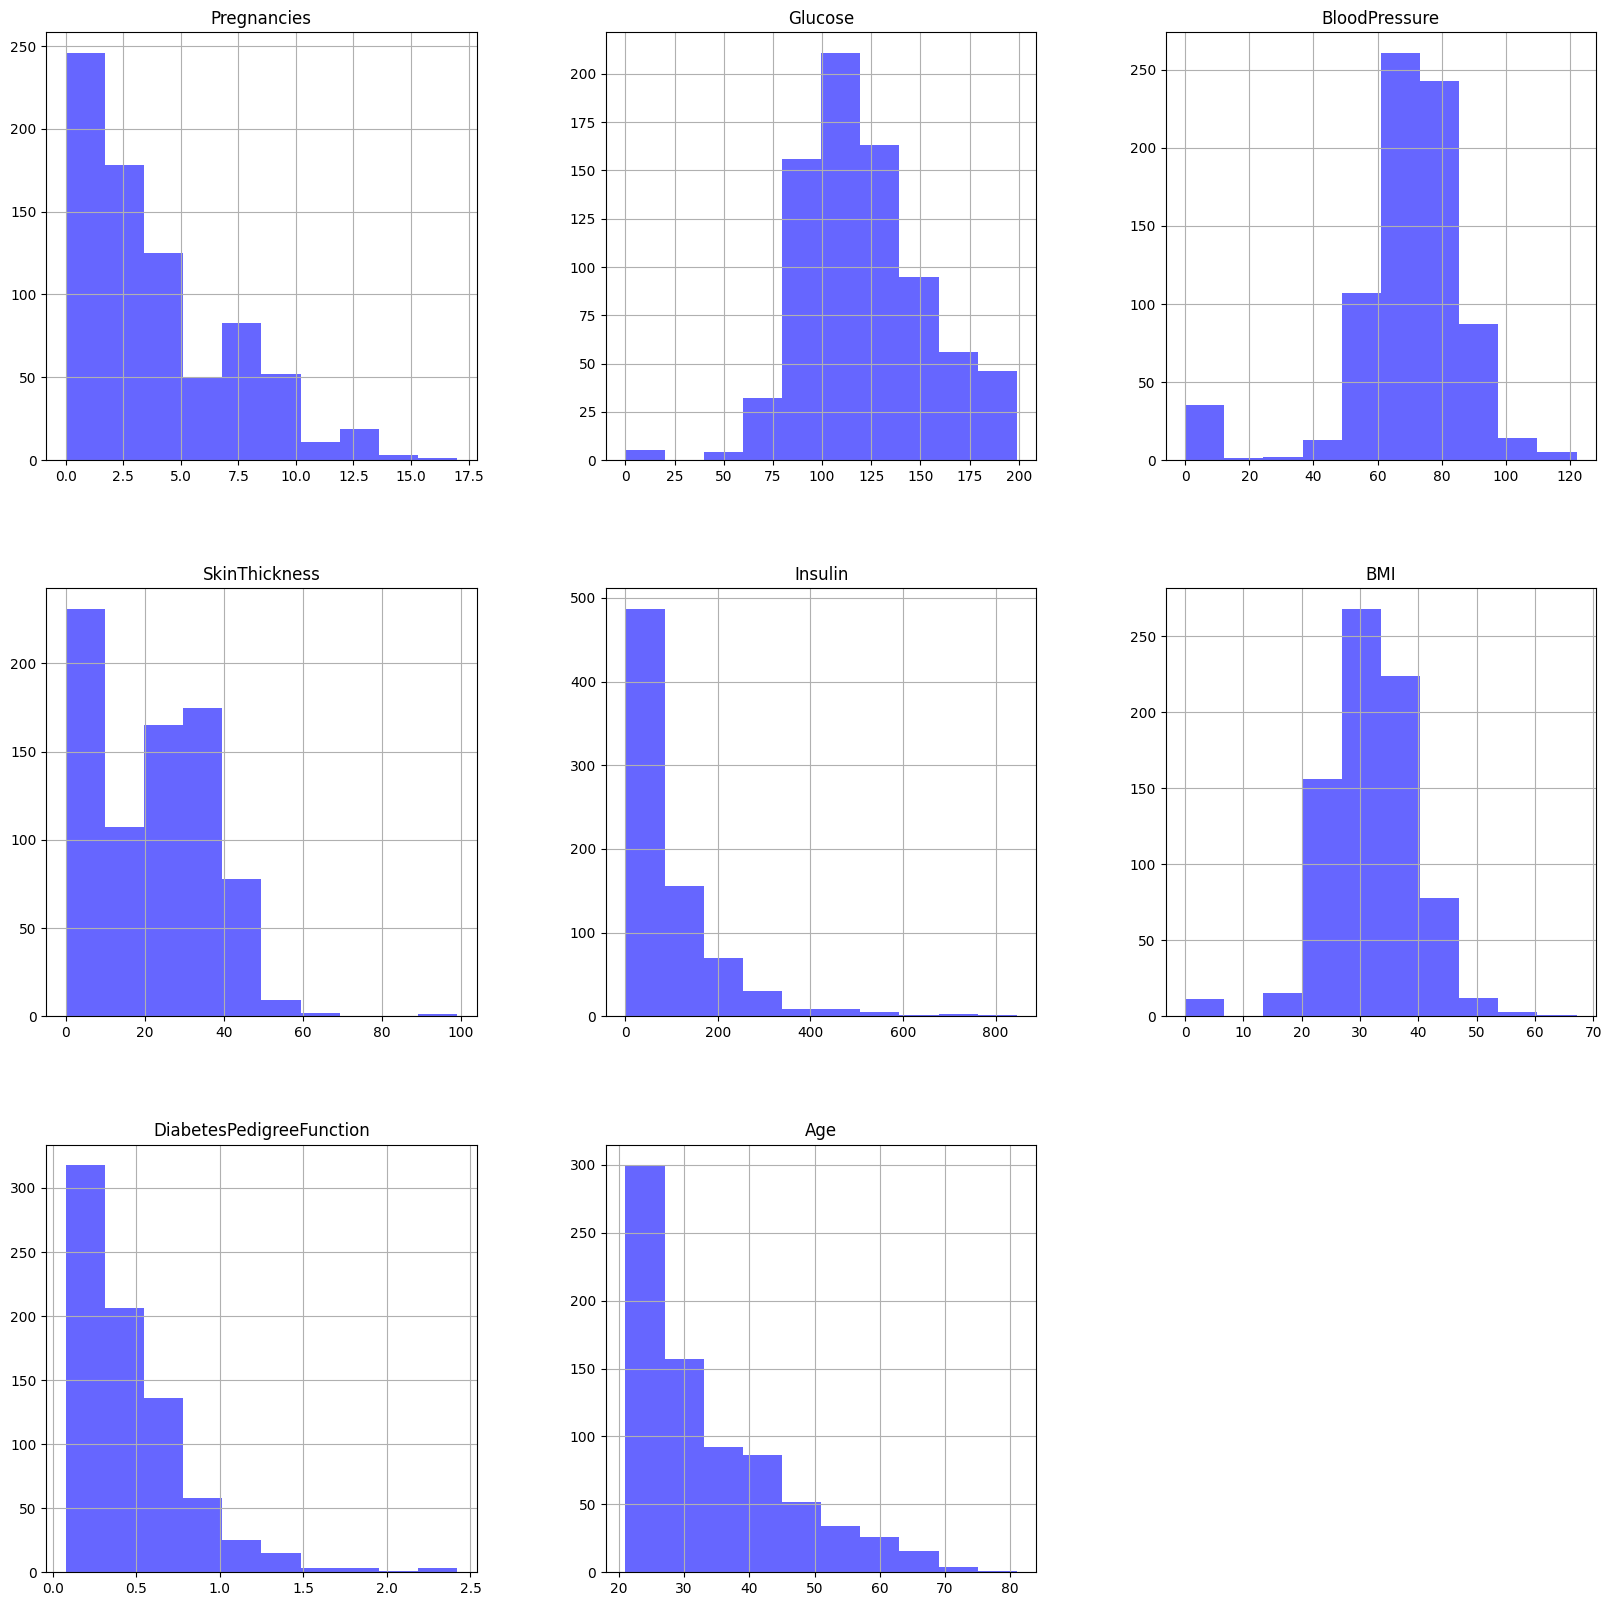

In [142]:
plt.figure(figsize=(20, 20))
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]].hist(color='blue', alpha=0.6, figsize=(20,20))

# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Histograms of Diabetes Data')

plt.show()

The dataset reveals that while variables such as Glucose, BMI, and Blood Pressure resembles a normal distributions, signifying symmetric variability around their mean, other variables like Insulin, Pregnancies, Skin Thickness (ST), Diabetes Pedigree Function (DPF), and Age display right-skewed distributions. 

From an analytical perspective, right-skewed variables may necessitate data transformation or the application of non-parametric methods to address skewness and manage outliers effectively, ensuring robust and accurate modeling. This approach is crucial for adapting the data to more closely meet the assumptions of various statistical and machine learning models.
####################

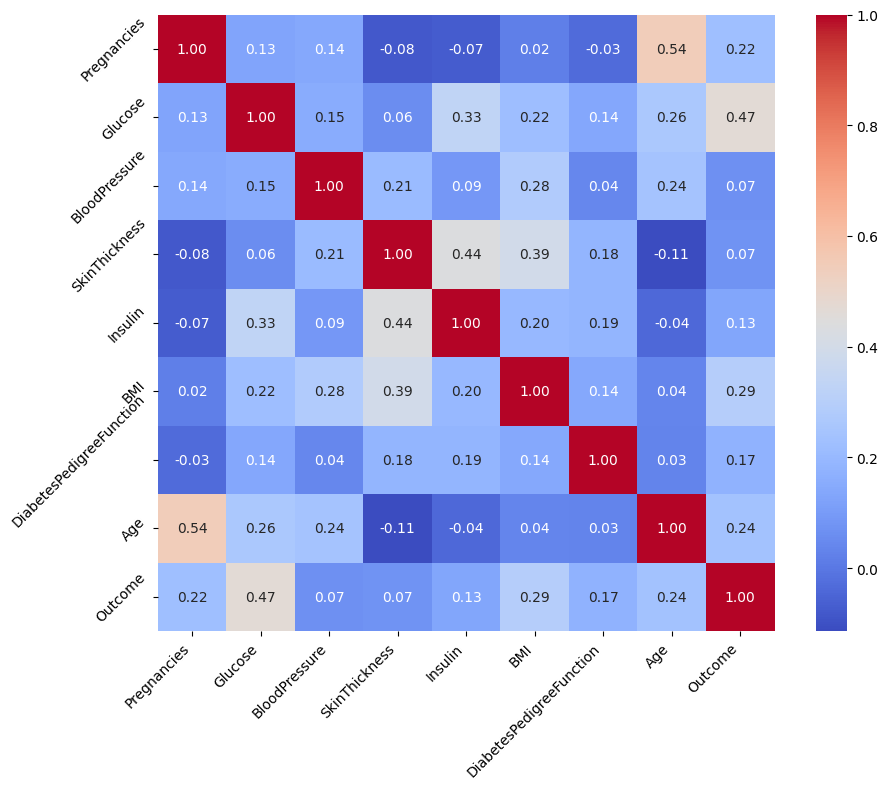

In [143]:

corr_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

plt.show()


The correlation heatmap reveals several significant associations: a moderate positive correlation between glucose levels and diabetes outcome suggests higher glucose levels are indicative of diabetes; a positive correlation between age and pregnancies indicates that as age increases, so does the number of pregnancies; and a positive correlation between insulin levels and skin thickness suggests a potential relationship, though further medical interpretation is needed. Most variables show low to moderate correlations with each other and the outcome, underscoring varying degrees of independence or weaker linear relationships. It's important to remember that correlation doesn't imply causation, and these findings aid in feature selection and identifying potential multicollinearity in predictive modeling.


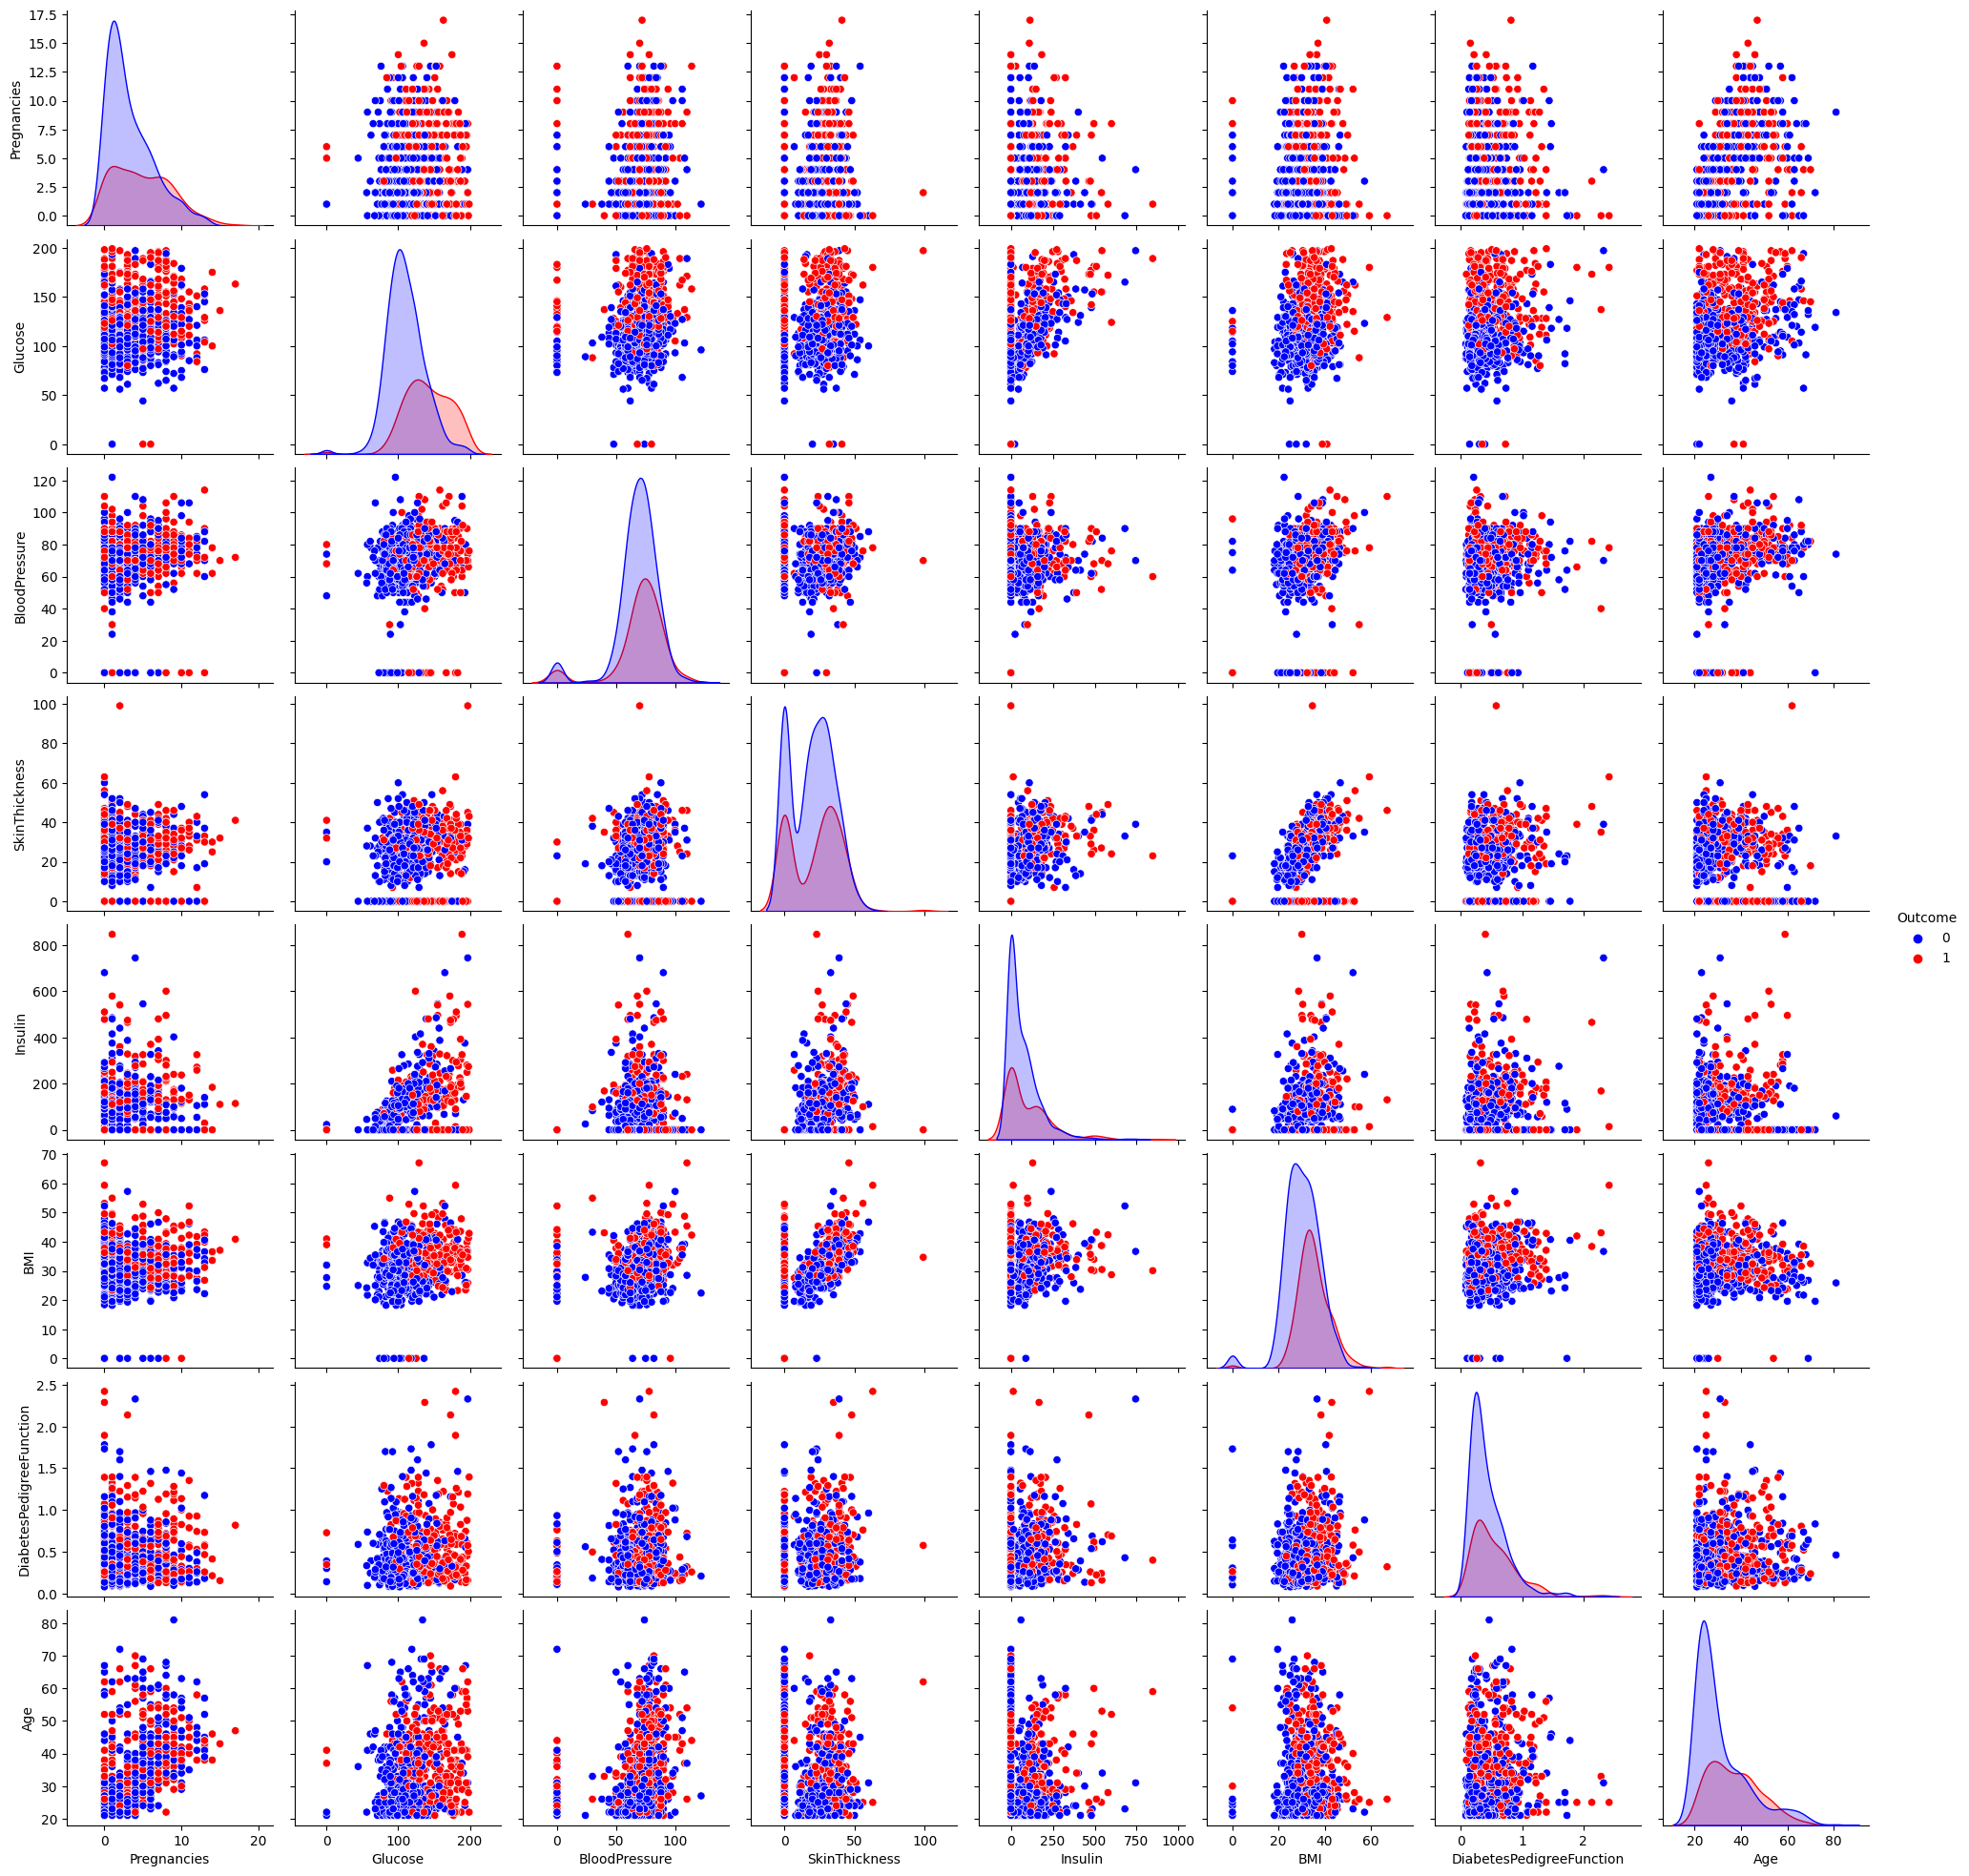

In [144]:
#Paired  plots
palette = {0: "blue", 1: "red"}
sns.pairplot(df, hue="Outcome", palette=palette)

plt.show()




The pairedplot shows cluster with high glucose but average BMI suggests a population of individuals with glucose intolerance or pre-diabetes symptoms independent of obesity. High glucose, BMI, and potentially insulin levels in a cluster may signify individuals at elevated risk of type 2 diabetes.
Different clusters hint at varying diabetes types or stages. High insulin levels alongside moderate glucose levels could denote insulin resistance, a precursor to type 2 diabetes.

Clusters prompt further analysis to understand commonalities within each group, guiding deeper exploration, feature engineering, and predictive modeling efforts.

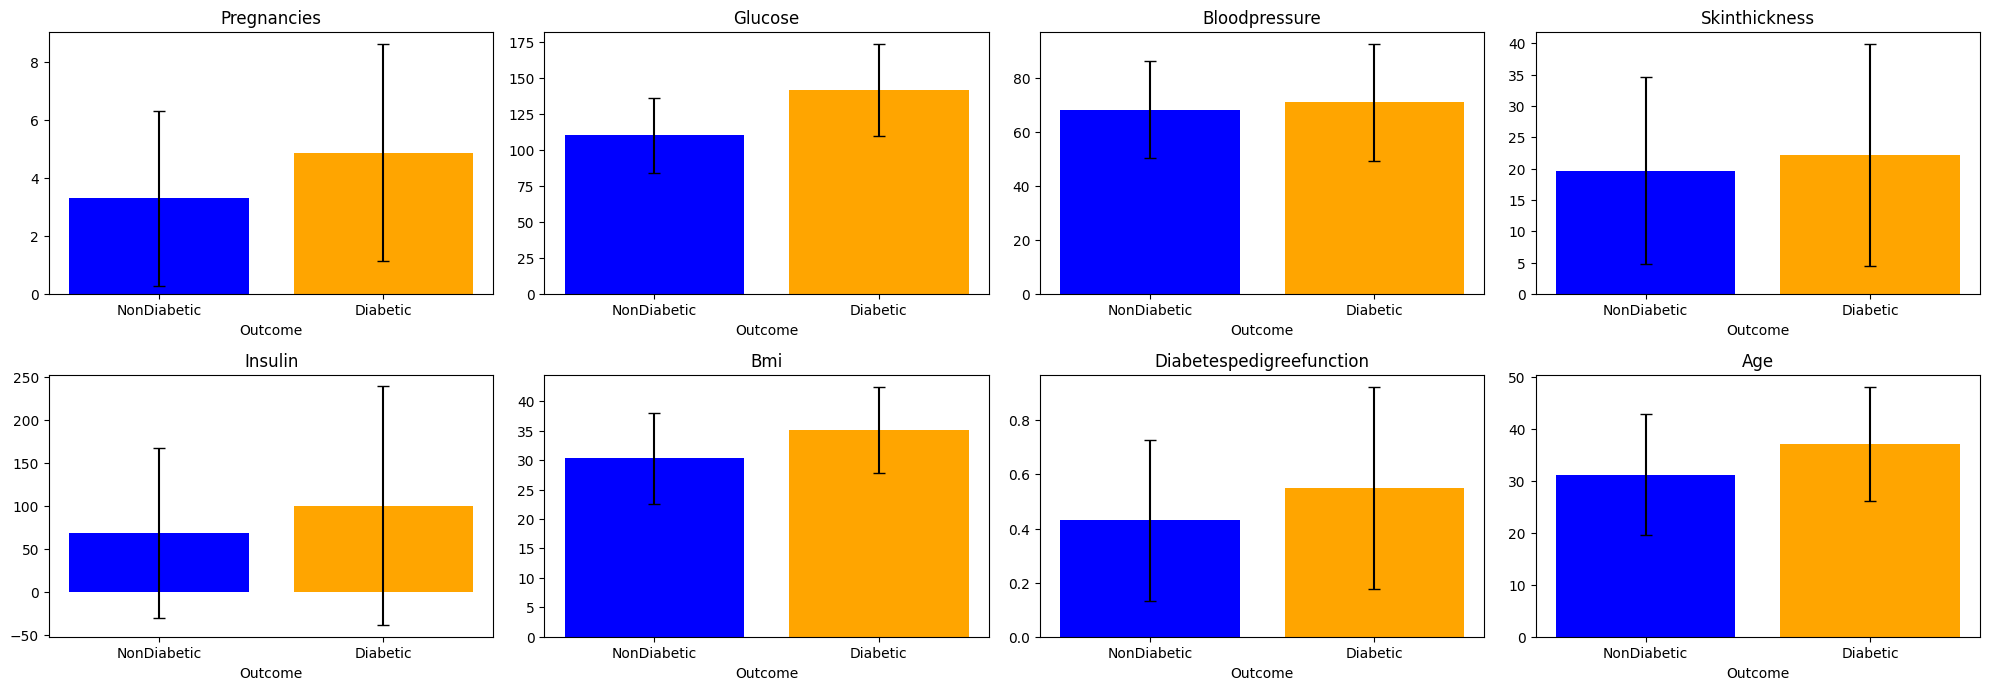

In [145]:

    
#Calculate means and standard deviations
means = df.groupby('Outcome').mean()
std_devs = df.groupby('Outcome').std()

plt.figure(figsize=(20, 10))

for i, column in enumerate(means.columns):
    plt.subplot(3, 4, i + 1)
    plt.bar(x=means.index, height=means[column], yerr=std_devs[column], color=['blue', 'orange'], capsize=4)
    plt.title(column.replace('_', ' ').title())
    plt.xlabel('Outcome')
    plt.xticks([0, 1], ['NonDiabetic', 'Diabetic'])

plt.tight_layout()
plt.show()
    





Glucose levels tend to be elevated in diabetics due to inefficient absorption, while insulin levels is higher due to poor sensitivity of the insulin receptors in diabetics. Blood pressure regulation is often poor in the diabetic population. Additionally, skin thickness and BMI are higher in individuals with diabetes, with diabetes pedigree function also being higher in diabetics. Furthermore, diabetes is more prevalent in the older populations.

## Feature Engineering and EDA

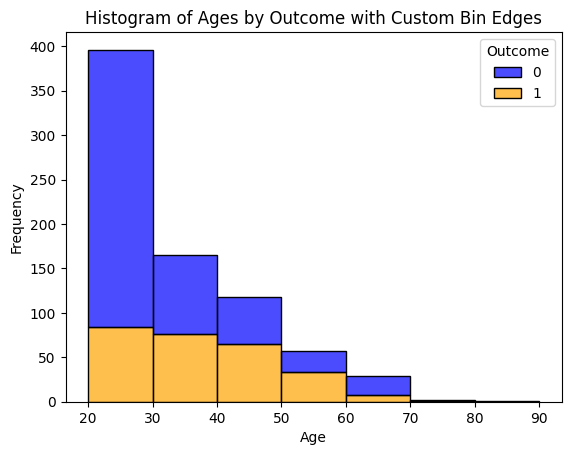

In [146]:
# Age categorization
bin_edges = [20, 30, 40, 50, 60, 70, 80, 90]

palette = {0: "blue", 1: "orange"}
sns.histplot(data=df, x='Age', hue='Outcome', bins=bin_edges, palette=palette, edgecolor='black', alpha=0.7, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages by Outcome with Custom Bin Edges')


plt.show()


This plot suggests a potential relationship between age and the prevalence of diabetes, with a higher likelihood of diabetes observed in older age groups within this dataset. There appears to be a higher frequency of younger individuals within the non-diabetic group (Outcome 0), as indicated by the taller blue bar in the first age bin. Conversely, as age increases, the proportion of individuals with diabetes (Outcome 1) increases, evidenced by the increasing height of the orange bars.   ################################ 50-60 ratio more- 


Here the ratio of the nondiabetics to diabetics has been shown. The ratio of nondiabetics is higher for age grps 20-40. Age groups 40-60 shows an the opposite trend. Again ages 60-80
shows more nondiabtics this could be due to less sample in that range- an artifact. 



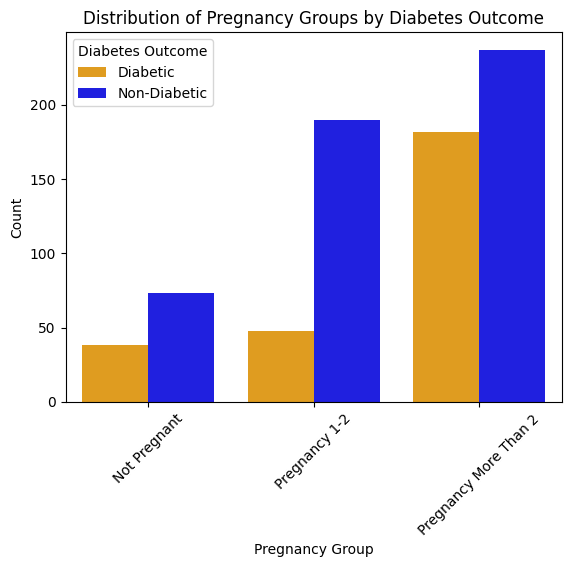

In [147]:
# Pregnancies categorization into 3 groups to determine if higher pregnancy leads to poor glucose control 

# Binning the 'Pregnancies' column
bins = [-1, 0, 2, float('inf')]  # The bins are set from -1 to ensure 0 is included in the first bin
labels = ['Not Pregnant', 'Pregnancy 1-2', 'Pregnancy More Than 2']
df['Pregnancy_Group'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels)

# Mapping 'Outcome' to labels for clearer visualization
df['Outcome_Label'] = df['Outcome'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

# Setting up the color palette to match previous plots
palette = {'Non-Diabetic': "blue", 'Diabetic': "orange"}

# Creating the count plot
sns.countplot(data=df, x='Pregnancy_Group', hue='Outcome_Label', palette=palette,
              order=['Not Pregnant', 'Pregnancy 1-2', 'Pregnancy More Than 2'])

plt.title('Distribution of Pregnancy Groups by Diabetes Outcome')
plt.xlabel('Pregnancy Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes Outcome')

plt.show()



This distribution suggests that as the number of pregnancies increases, the proportion of individuals with diabetes also increases. This could indicate a potential link between the number of pregnancies and the risk of developing diabetes, a finding that aligns with medical understanding that multiple pregnancies may increase the risk of developing gestational diabetes, which can lead to type 2 diabetes later in life. 

Note that the ratio of diabetics is less in the second grp that the other two groups. 

## Data Transformation

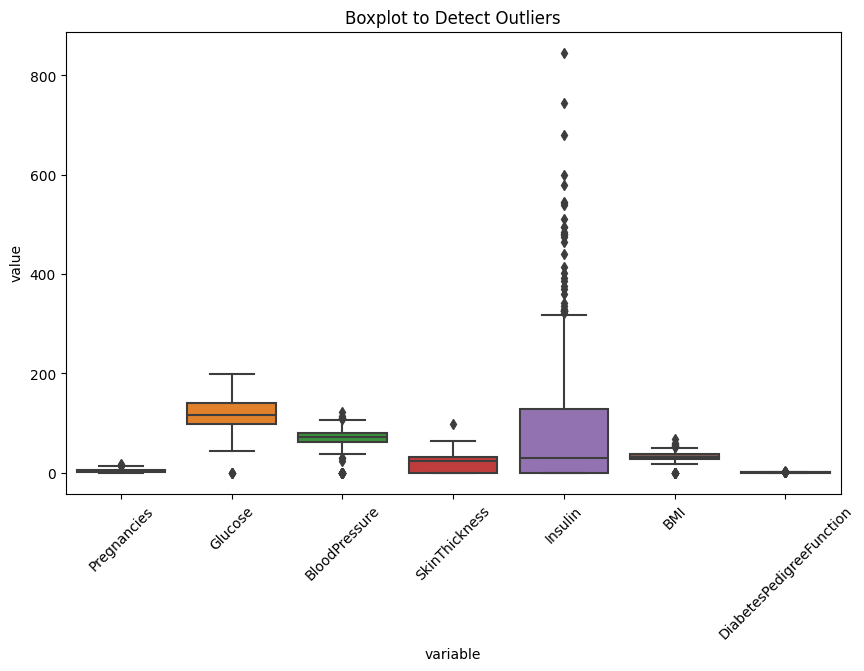

In [148]:
#Outlier analysis 
df_melted = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']].melt()

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot to Detect Outliers', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x labels for better readability
plt.yticks(fontsize=10)
plt.show()

The boxplot reveals some outliers specially in Insulin however the level of Insulin is within physiological range post 2hrs meal. 

In [149]:
# Zero counts
zero_counts = {}


for col in df.columns:
    zero_counts[col] = (df[col] == 0).sum()
print(zero_counts)


{'Pregnancies': 111, 'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'Outcome': 500, 'Pregnancy_Group': 0, 'Outcome_Label': 0}


Note that there are no missing values and N/A however there are 0's in SkinThickness, Insulin and BMI columns. Pregnancies may also have some unreal 0 but it is hard to know the authenticity 


In [150]:
#Percentzeros in total dataframe
(df.iloc[:,1:-1]==0).sum().sum()/(768*7)

#df.iloc[:,1:-1].columns

0.21428571428571427

In [151]:
#Replace age with age groups

bin_edges = [20, 40, 60, float('inf')]  # the last bin edge ensures that all ages above 60 are included in the '61 above' category.

# Define labels for each age group
labels = ['21-40', '41-60', '61 above'] #indicates that the bins are left-inclusive, which means that an age of exactly 40 is categorized as '21-40', and an age of 60 falls into the '41-60' group. This parameter is crucial for aligning the binning behavior with your group definitions.


df['AgeGroup'] = pd.cut(df['Age'], bins=bin_edges, labels=labels, right=False)

print(df[['Age', 'AgeGroup']].head(10))

   Age AgeGroup
0   50    41-60
1   31    21-40
2   32    21-40
3   21    21-40
4   33    21-40
5   30    21-40
6   26    21-40
7   29    21-40
8   53    41-60
9   54    41-60


In [152]:
#Replace pregnancy with pregnancy groups

# Define bins and labels for the categories
bins = [-1, 0, 2, float('inf')]  # The bins are set from -1 to ensure 0 is included in the first bin
labels = ['Not Pregnant', 'Pregnancy 1-2', 'Pregnancy More Than 2']

df['Pregnancy_Group'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels)

print(df[['Pregnancies', 'Pregnancy_Group']])

     Pregnancies        Pregnancy_Group
0              6  Pregnancy More Than 2
1              1          Pregnancy 1-2
2              8  Pregnancy More Than 2
3              1          Pregnancy 1-2
4              0           Not Pregnant
..           ...                    ...
763           10  Pregnancy More Than 2
764            2          Pregnancy 1-2
765            5  Pregnancy More Than 2
766            1          Pregnancy 1-2
767            1          Pregnancy 1-2

[768 rows x 2 columns]


In [153]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_Group,Outcome_Label,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,Pregnancy More Than 2,Diabetic,41-60
1,1,85,66,29,0,26.6,0.351,31,0,Pregnancy 1-2,Non-Diabetic,21-40
2,8,183,64,0,0,23.3,0.672,32,1,Pregnancy More Than 2,Diabetic,21-40
3,1,89,66,23,94,28.1,0.167,21,0,Pregnancy 1-2,Non-Diabetic,21-40
4,0,137,40,35,168,43.1,2.288,33,1,Not Pregnant,Diabetic,21-40


In [154]:
# Convertion of  'AgeGroup' and 'Pregnancy_Group' into dummy variables
df = pd.get_dummies(df, columns=['AgeGroup', 'Pregnancy_Group'], drop_first=True, dtype=int)



In [155]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Outcome_Label',
       'AgeGroup_41-60', 'AgeGroup_61 above', 'Pregnancy_Group_Pregnancy 1-2',
       'Pregnancy_Group_Pregnancy More Than 2'],
      dtype='object')

In [156]:
# Splitting the data set into test and train


X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'] + 
       [col for col in df.columns if 'AgeGroup_' in col or 'Pregnancy_Group_' in col]]
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Imputation

In [157]:
from sklearn.impute import SimpleImputer

tobeImputed = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

imputer = SimpleImputer(missing_values=0)

imputer.fit(X_train[tobeImputed])

imp_x_train_sub = imputer.transform(X_train[tobeImputed]) # numpy array

imp_x_train_sub= pd.DataFrame(imp_x_train_sub,columns=tobeImputed, index=X_train.index) # make pd 

imp_x_test_sub= pd.DataFrame(imputer.transform(X_test[tobeImputed]),columns=tobeImputed, index=X_test.index)

In [158]:
# X_train to be concatenated with imp_x_train_sub

X_train=X_train.drop(columns= tobeImputed).copy() # always copy


In [159]:
X_train.columns

Index(['DiabetesPedigreeFunction', 'AgeGroup_41-60', 'AgeGroup_61 above',
       'Pregnancy_Group_Pregnancy 1-2',
       'Pregnancy_Group_Pregnancy More Than 2'],
      dtype='object')

In [160]:
X_train.index

Index([ 60, 618, 346, 294, 231, 340, 535, 306, 718,  90,
       ...
       466, 121, 614,  20, 700,  71, 106, 270, 435, 102],
      dtype='int64', length=614)

In [161]:
imp_x_train_sub.index

Index([ 60, 618, 346, 294, 231, 340, 535, 306, 718,  90,
       ...
       466, 121, 614,  20, 700,  71, 106, 270, 435, 102],
      dtype='int64', length=614)

In [162]:
X_train= pd.concat([X_train,imp_x_train_sub], axis=1)

In [163]:
# X_test to be concatenated with imp_x_test_sub

X_test=X_test.drop(columns= tobeImputed).copy() # always copy

In [164]:
X_test=pd.concat([X_test,imp_x_test_sub], axis=1)

Mean imputation was deemed unsuitable for certain variables, such as Insulin, which exhibited a significant number of zeros, indicating the presence of missing or non-recorded values. Relying on the mean for imputation in such cases could potentially lead to misleading representations of the data, especially when the distribution is skewed by a large number of zeros.

KNN (K-Nearest Neighbors) imputation, which could provide a more nuanced method of imputing missing values by considering the similarity between instances, was also considered. However, the practical application of KNN imputation was hindered by challenges in applying the KNN transformation effectively to the dataset. This could be due to the computational demands of KNN imputation or the complexity of integrating the transformed data back into the modeling process.

Consequently, the SimpleImputer method was employed for imputing missing values. This method offers a straightforward approach to handle missing data by filling in missing values using a specified placeholder or statistic (e.g., median or most frequent value) for each column. The choice of the imputation strategy, in this case, balanced the need for simplicity and effectiveness in handling missing values, ensuring that the resulting dataset could be more reliably used for subsequent analysis and modeling.

In [165]:

#Standard scalar is used as most of the data follows Guassian distribution
# Initialize the scaler
scaler = StandardScaler().set_output(transform = 'pandas')

# Fit on training data and transform it ##### just do the x_train first
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


Min max scalar didnot work well with this data so we used standard scalar instead. 

In [166]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform both the scaled training and testing data using the fitted PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [167]:
np.cumsum(pca.explained_variance_ratio_)

array([0.24222423, 0.40985422, 0.53003242, 0.63347461, 0.72694406,
       0.81441968, 0.87990556, 0.93565161, 0.97510497, 1.        ])

In [168]:
X_train_scaled_pca=pd.DataFrame(X_train_pca).iloc[:,:8]

In [169]:
X_test_scaled_pca=pd.DataFrame(X_test_pca).iloc[:,:8]

In [170]:
X_train_scaled_pca.index=y_train.index

In [171]:
X_test_scaled_pca.index=y_test.index

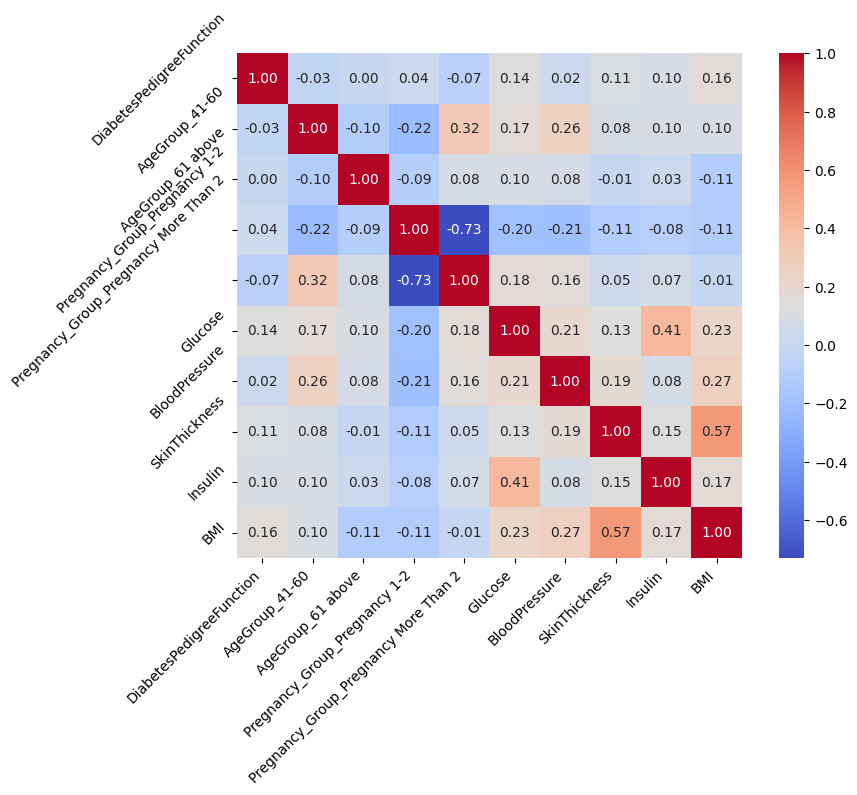

In [172]:
corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

plt.show()


Binned Features: The new categorical variables, 'AgeGroup_41-60', 'AgeGroup_61 above', and 'Pregnancy_Group_More Than 2', show correlations with other variables. For instance, 'Pregnancy_Group_More Than 2' has a strong negative correlation with glucose (-0.73), suggesting that in the higher pregnancy group, glucose levels might be inversely related. This could be due to physiological changes during pregnancy affecting glucose metabolism.

Considerations for Analysis: While binning can reveal trends that are not apparent when using continuous data, it can also obscure finer details. The correlations need to be interpreted with an understanding of the clinical implications of these binned groups.





## Model Generation



Classifiers that will be used:
<Br>-Logistic Regression Classifier, Statsmodel
<Br>-Decision Tree Classifier
<Br>-Random Forest Classifier
<Br>-XGB Classifier
<Br>-Naive Bayes Classifier
<Br>-Neural Networks Classifier
<Br>-KNN Classifier
<Br>-SVM Classifier
<Br>-LGBM Classifier
<Br>-MLP Classifier   
<Br>-Ensemble model Classifier


## Logistic Regression

In [173]:
# Initialization the classifier
logreg = LogisticRegression(penalty='l1', solver="liblinear", max_iter=1000, C= 1.5, random_state=42)

# Cross-validation
scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='f1')  # Example using 5-fold CV and accuracy as the metric

# Print average score
print("Average f1:", np.mean(scores))  

Average f1: 0.6332595124174072


In [174]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.5, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [175]:
y_logreg_pred=logreg.predict(X_test_scaled)

In [176]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_logreg_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_logreg_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_logreg_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_logreg_pred))  
# F1 score is a better measure of performance than an accuracy score because accuracy score only looks 
#at TP and TN whereas F1 score combines precision and recall so combines all 4 quadrants of the confusion matrix. F1 score is high when FP and FN are low.  


Accuracy: 0.798701
Precision: 0.750000
Recall: 0.654545
F1 Score: 0.699029


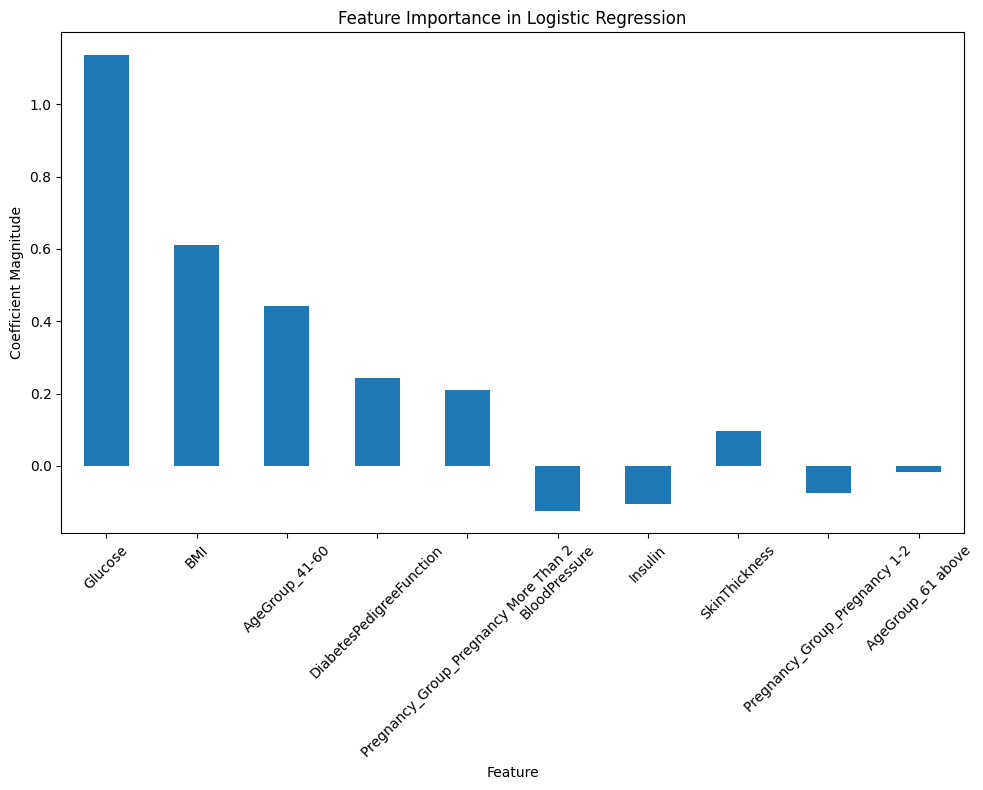

In [177]:
# Feature importances
# Fit the logistic regression model (ensure your data is already preprocessed)
# logreg = LogisticRegression(max_iter=1000)
# logreg.fit(X_train_scaled, y_train)

# Get the coefficients from the logistic regression model
coefficients = logreg.coef_[0]

# Create a series with feature names and coefficients
feature_importance = pd.Series(coefficients, index=X_train.columns).sort_values(key=abs, ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()

The strongest impact on LOGIT of the diabetes outcomes comes from glucose, bmi and age.

## Logistic Regression using Statsmodel


In [178]:

# Addition of constant to the model (the intercept)
X_train_scaled = sm.add_constant(X_train_scaled)
# Fit the model
model = sm.Logit(y_train, X_train_scaled).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.457364
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      603
Method:                           MLE   Df Model:                           10
Date:                Wed, 20 Mar 2024   Pseudo R-squ.:                  0.2915
Time:                        10:23:20   Log-Likelihood:                -280.82
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 5.191e-44
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8814      

From the p values we see that the Pregnancy groups are not stat sig and so is the age group above 60. Sig predictors could be Glucose, BMI and DPF.
age grp 41-60. We will use these variables only for prediction.

# Logistic Regression with Feature Selection

In [179]:
## logreg with only 'Glucose','BMI','AgeGroup_41-60','DiabetesPedigreeFunction'

# Initialization the classifier
logreg = LogisticRegression(penalty='l1', solver="liblinear", max_iter=1000, C= 1.5, random_state=42)

sig_col=['Glucose','BMI','AgeGroup_41-60','DiabetesPedigreeFunction']

# # Cross-validation
scores = cross_val_score(logreg, X_train_scaled[sig_col], y_train, cv=5, scoring='f1') 


F1 score is a better measure of performance than an accuracy score because accuracy score only looks at TP and TN whereas F1 score combines precision and recall so combines all 4 quadrants of the confusion matrix. F1 score is high when FP and FN are low. 



In [180]:
logreg.fit(X_train_scaled[sig_col], y_train)

LogisticRegression(C=1.5, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [181]:
y_logreg_pred=logreg.predict(X_test_scaled[sig_col])

In [182]:
# Calculate the scores
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_logreg_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_logreg_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_logreg_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_logreg_pred))  #f1 increased on test set 

Accuracy: 0.798701
Precision: 0.750000
Recall: 0.654545
F1 Score: 0.699029


In [183]:
# Tuning of Logistic regression model
param_grid = {
    'C': [0.5,1,1.25,1.5,1.75,2,5,10],  
   
}

In [184]:
logreg.fit(X_train_scaled[sig_col], y_train)

LogisticRegression(C=1.5, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [185]:
# Using the best estimator to make predictions
#best_lr = grid_search.best_estimator_

y_logreg_pred=logreg.predict(X_test_scaled[sig_col])

In [186]:
# Calculate the scores
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_logreg_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_logreg_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_logreg_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_logreg_pred))  #f1 increased on test set 

Accuracy: 0.798701
Precision: 0.750000
Recall: 0.654545
F1 Score: 0.699029


Not much difference in the scores was achieved after droping the less significant variables. 

Technical consideration: Remove the const from the dataset.

In [187]:
#After running statsmodel remove constant 

X_train_scaled.drop('const',axis=1, inplace=True)

## Decision Tree

In [188]:
#Initialization the classifier

dt_clf = DecisionTreeClassifier(random_state=42)

In [189]:
# Train the classifier
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [190]:
# Make predictions on the testing set
y_dt_pred = dt_clf.predict(X_test_scaled)

In [191]:
# Calculate the scores
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_dt_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_dt_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_dt_pred))

Accuracy: 0.694805
Precision: 0.568966
Recall: 0.600000
F1 Score: 0.584071


In [192]:
# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [195]:
# Train the classifier
dt_clf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_bedt_pred = dt_clf.predict(X_test_scaled)

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_bedt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_bedt_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_bedt_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_bedt_pred))

Accuracy: 0.694805
Precision: 0.568966
Recall: 0.600000
F1 Score: 0.584071


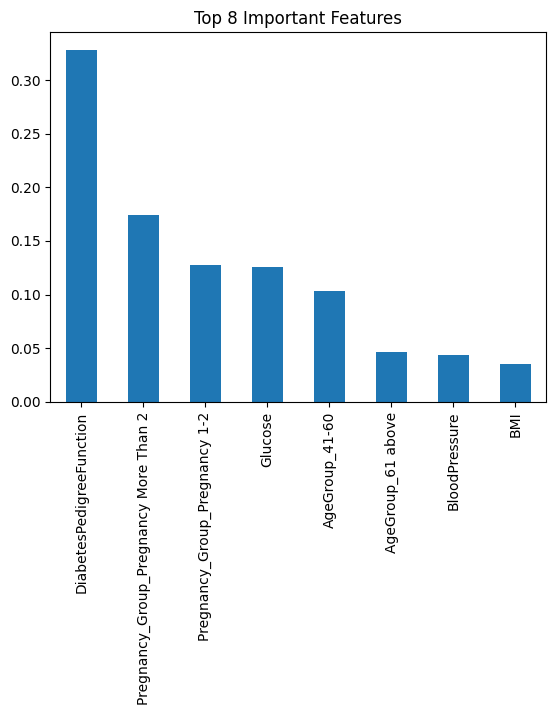

In [197]:
# Feature importances
feature_importances = pd.Series(dt_clf.feature_importances_, index=X.columns)

feature_importances.nlargest(8).plot(kind='bar')  # Adjust the number as needed
plt.title('Top 8 Important Features')
plt.show()

## RANDOM FOREST

In [81]:
# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)   

# Train the classifier 
rf_clf.fit(X_train_scaled, y_train)  

RandomForestClassifier(random_state=42)

In [82]:
# Make predictions on the test set
y_rf_pred = rf_clf.predict(X_test_scaled)       ##### predict- model



In [83]:
# Calculate the scores
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_rf_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_rf_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_rf_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_rf_pred)) 

Accuracy: 0.766234
Precision: 0.679245
Recall: 0.654545
F1 Score: 0.666667


In [84]:
#Hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}


In [85]:
%%time
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)       

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
CPU times: user 1.51 s, sys: 240 ms, total: 1.75 s
Wall time: 1min 3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [86]:
# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_    # best model
# Make predictions on the test set
y_pred = best_rf.predict(X_test_scaled)

In [87]:
# Calculate the scores
print("Random Forest")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Random Forest
Accuracy: 0.753247
Precision: 0.673469
Recall: 0.600000
F1 Score: 0.634615


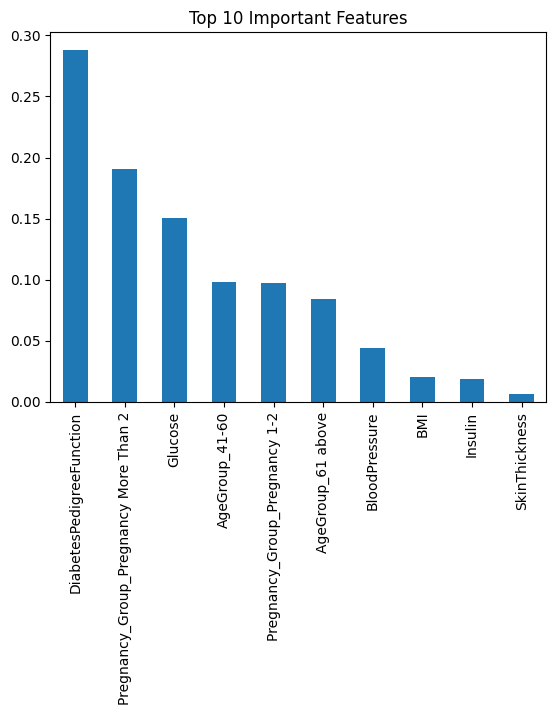

In [88]:
# Get feature importances
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)

# Plot feature importances
feature_importances.nlargest(10).plot(kind='bar')  # Adjust the number as needed
plt.title('Top 10 Important Features')
plt.show()

## NAIVE BAYES

In [89]:
# Initialize the classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [90]:
# Make predictions on the test set
y_gnb_pred = gnb.predict(X_test_scaled)



In [91]:
# Calculate the scores
print("NB")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_gnb_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_gnb_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_gnb_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_gnb_pred))

NB
Accuracy: 0.759740
Precision: 0.673077
Recall: 0.636364
F1 Score: 0.654206


## SVM Classifier

In [92]:
# Initialize the classifier
clf = SVC(gamma='auto')

# Train the classifier
clf.fit(X_train_scaled, y_train)

SVC(gamma='auto')

In [93]:
# Make predictions on the test set
y_svc_pred = gnb.predict(X_test_scaled)

In [94]:
# Calculate the scores
print("SVM")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_svc_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_svc_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_svc_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_svc_pred))

SVM
Accuracy: 0.759740
Precision: 0.673077
Recall: 0.636364
F1 Score: 0.654206


In [95]:

param_grid = {
    'C': [150, 160, 165, 170, 175],  # Example refined range
    'gamma': [0.005, 0.007, 0.008, 0.0001, 0.0002],  # Example refined range
    'kernel': ['rbf', 'linear', 'poly'],  # Exploring different kernels; added missing comma here
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]  # Adjusting for class imbalance
}

In [96]:
%%time
# Initialize the classifier
clf = SVC(random_state=42)       

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; 

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [150, 160, 165, 170, 175],
                         'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 3}],
                         'gamma': [0.005, 0.007, 0.008, 0.0001, 0.0002],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=2)

In [97]:

grid_search.best_params_

{'C': 170, 'class_weight': None, 'gamma': 0.0001, 'kernel': 'rbf'}

In [98]:

best_svc = grid_search.best_estimator_ 
# Make predictions on the test set
y_svc_pred = best_svc.predict(X_test_scaled)

In [99]:
# Calculate the scores
print("Tuned SVM")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_svc_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_svc_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_svc_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_svc_pred))

Tuned SVM
Accuracy: 0.811688
Precision: 0.782609
Recall: 0.654545
F1 Score: 0.712871


## KNN Classifier

In [100]:
# Initialize the classifier
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [101]:
y_neigh_pred = neigh.predict(X_test_scaled)

In [102]:
# Calculate the scores
print("KNN")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_neigh_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_neigh_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_neigh_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_neigh_pred))

KNN
Accuracy: 0.727273
Precision: 0.606557
Recall: 0.672727
F1 Score: 0.637931


In [103]:
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'n_neighbors': 27, 'weights': 'uniform'}


In [104]:
# Make predictions on the test set
y_neigh_pred = neigh.predict(X_test_scaled)

In [105]:
# Calculate the scores
print("KNN")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_neigh_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_neigh_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_neigh_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_neigh_pred))


KNN
Accuracy: 0.727273
Precision: 0.606557
Recall: 0.672727
F1 Score: 0.637931


## XGBoost Classifier

In [106]:
# Initialize the classifier


xgb_clf = XGBClassifier(objective='binary:logistic', random_state=0)

parameters = {
     'max_depth': [1, 2, 3, 4],
     'n_estimators': [50, 75, 100, 200, 300],
     'learning_rate': [0.01,0.1, 0.15,0.2],
     'max_delta_step':[1,2,3,4,5],
     'subsample': [0.8, 0.9, 1.0],
     'gamma':[0.15,0.2, 0.25,0.3]
    
 }
# Train the classifier
xgb_clf = xgb_clf.fit(X_train_scaled, y_train)  

In [107]:
y_xgb_pred=xgb_clf.predict(X_test_scaled)

In [108]:
# Calculate the scores
print("XGB")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_xgb_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_xgb_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_xgb_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_xgb_pred))

XGB
Accuracy: 0.746753
Precision: 0.666667
Recall: 0.581818
F1 Score: 0.621359


In [109]:
# Tuned model
######################

In [110]:
# Calculate the scores
print("Tuned XGB")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_xgb_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_xgb_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_xgb_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_xgb_pred))


Tuned XGB
Accuracy: 0.746753
Precision: 0.666667
Recall: 0.581818
F1 Score: 0.621359


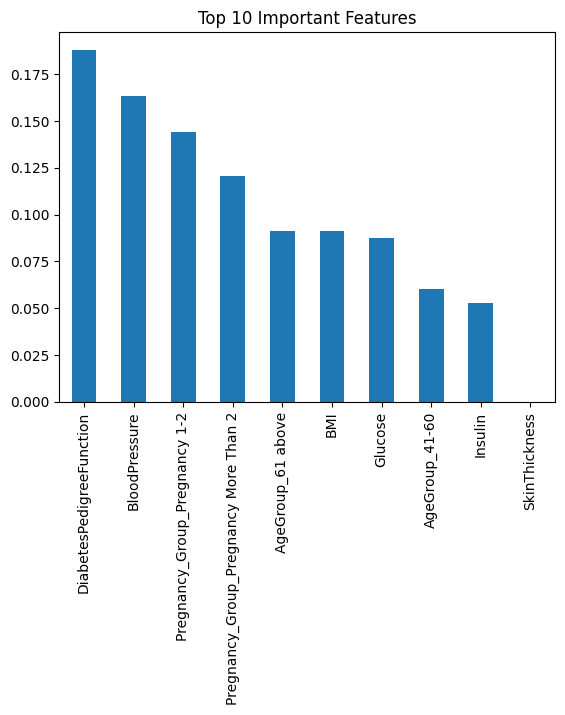

In [111]:
# Get feature importances
feature_importances = pd.Series(xgb_clf.feature_importances_, index=X.columns)

# Plot feature importances
feature_importances.nlargest(10).plot(kind='bar')  # Adjust the number as needed
plt.title('Top 10 Important Features')
plt.show()

## Neural Net 

In [112]:
#NEURAL NETWORK MODEL (Multilayer perceptron)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [113]:
# Initialize the classifier
mlp = MLPClassifier(hidden_layer_sizes=(25), activation='logistic', max_iter=2000, learning_rate= 'constant', alpha=0.0001, solver='adam', random_state=42)

# Train the classifier
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=25, max_iter=2000,
              random_state=42)

In [114]:
# Make predictions on the test set
y_mlp_pred = mlp.predict(X_test_scaled)


In [115]:
# Calculate the scores
print("MLP")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_mlp_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_mlp_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_mlp_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_mlp_pred))


MLP
Accuracy: 0.785714
Precision: 0.720000
Recall: 0.654545
F1 Score: 0.685714


## Tuned Neural Net model

In [116]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100),(50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

In [117]:
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, scoring='accuracy', verbose=1)
# Train the classifier
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/tridibdutta/anaconda3/envs/Learning/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tridibdutta/anaconda3/envs/Learning/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tridibdutta/anaconda3/envs/Learning/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tridibdutta/anaconda3/envs/Learning/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the opti

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=25, max_iter=2000,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 100), (50, 50)],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=1)

In [118]:
# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Best cross-validation score
print("Best cross-validation score (accuracy):", grid_search.best_score_)

# Test set score
test_score = grid_search.score(X_test_scaled, y_test)
print("Test set score with best parameters:", test_score)

Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'solver': 'sgd'}
Best cross-validation score (accuracy): 0.7719978675196588
Test set score with best parameters: 0.8116883116883117


In [119]:
# Make predictions on the test set
y_bemlp_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [120]:
# Calculate the scores
print("Tuned MLP")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_bemlp_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_bemlp_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_bemlp_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_bemlp_pred))

Tuned MLP
Accuracy: 0.811688
Precision: 0.782609
Recall: 0.654545
F1 Score: 0.712871


## LGBM

In [ ]:
# Initialize the classifier
clf = lgbm.LGBMClassifier()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions
y_lgbm_pred = clf.predict(X_test_scaled)

In [122]:
# Calculate the scores
print("LGBM")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_lgbm_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_lgbm_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_lgbm_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_lgbm_pred))

LGBM
Accuracy: 0.727273
Precision: 0.638298
Recall: 0.545455
F1 Score: 0.588235


In [123]:
# Define the parameter grid for LGBMClassifier
param_grid = {
    'num_leaves': [31, 41, 51],
    'max_depth': [10, 20, 30, -1],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200]
}

# Train the classifier

clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_lgbm_pred = clf.predict(X_test_scaled)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [124]:
# Calculate the scores
print("Tuned LGBM")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_lgbm_pred)) 
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_lgbm_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_lgbm_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_lgbm_pred))

Tuned LGBM
Accuracy: 0.727273
Precision: 0.638298
Recall: 0.545455
F1 Score: 0.588235


## Ensemble model

In [125]:

# Define MLP parameters
mlp_params = {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'sgd'}

# Define the list of estimators
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('mlp', MLPClassifier(**mlp_params)),
    ('svm', SVC(probability=True, random_state=42)),  
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB()),  # Add Naive Bayes classifier
    ('lgbm', LGBMClassifier(random_state=42)),  # Add LGBM classifier
    ('dt', DecisionTreeClassifier(random_state=42))  # Add Decision Tree classifier
]

stc_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv=5
)


stc_clf.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Test score: ", stc_clf.score(X_test_scaled, y_test))




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [126]:
# Make predictions on the test set


y_stc_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [127]:
# Calculate the scores
print("Ensemble Model")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_stc_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_stc_pred)) 
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_stc_pred)) 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_stc_pred))

Ensemble Model
Accuracy: 0.811688
Precision: 0.782609
Recall: 0.654545
F1 Score: 0.712871


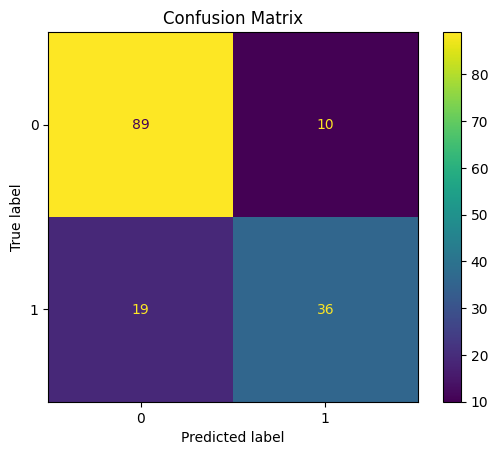

[CV] END .C=150, class_weight=None, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .C=150, class_weight=None, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .C=150, class_weight=None, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END C=150, class_weight=None, gamma=0.0001, kernel=linear; total time=   0.4s
[CV] END C=150, class_weight=None, gamma=0.0001, kernel=linear; total time=   0.7s
[CV] END C=150, class_weight=None, gamma=0.0001, kernel=linear; total time=   0.9s
[CV] END C=150, class_weight=None, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END C=150, class_weight=balanced, gamma=0.0002, kernel=linear; total time=   0.4s
[CV] END C=150, class_weight=balanced, gamma=0.0002, kernel=linear; total time=   0.7s
[CV] END C=150, class_weight=balanced, gamma=0.0002, kernel=linear; total time=   0.6s
[CV] END C=150, class_weight=balanced, gamma=0.0002, kernel=linear; total time=   0.5s
[CV] END C=150, class_weight={0: 1, 1: 2}, gamma=0.0001, kernel=poly; total tim

In [128]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_svc_pred)

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()

# Optionally, customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**Insights from the confusion matrix**

From the test set- 
TN-89 actually Nondiabetic and predicted correctly as nondiabetic, 
TP-36 actually Diabetic and predicted corectly as diabetic. 
FN-19 actually diabetic and predicted wrongly as nondiabetic
FP-10 actually nondiabetic and predicted wrongly as diabetic


Accuracy score- (TP + TN) / Total = (36 + 89) / (36 + 10 + 89 + 19)=125/154=0.811
Precision score- 36 / (36 + 10)=0.782
Recall score-36/(19+36)=0.654
F1 score- Harmonic average of recall and precision 2/(1/precision+1/recall)=2/(1/0.782+1/0.654)=2/(1.278+1.529)=2/2.807=0.712

F1 score covers information for all the quadrants hence it is a better readout of the model performance. 

In the healthcare setting, the goal would often be to minimize the  false negatives and false positives to ensure that all potential diabetic patients are identified for further testing and treatment.

## CONCLUSIONS


**Insights from the models**

1. Feature selection- After using the statsmodel for logistic regression we found that'Glucose','BMI','AgeGroup_41-60','DiabetesPedigreeFunction' variables were statistically significant so we performed logistic regression on only these but the scores did not improve. Therefore we went with all the variables. 


2. Feature Engineering- As age have a profound effect on diabetes outcome we binned the ages to get better modeling indeed the age group 41-60 had better correlation. Similiar was the case with segregating the number of pregnancies. 


3. Data Transformation- The dataset has substantial 0's to address this we used simple imputer to impute 'Glucose','BloodPressure','SkinThickness','Insulin','BMI'. 


4. Model performance- SVM, MLP models performed the best with comparable F1 scores, the ensemble model also had comparable scores. Prinicipal component analysis (PCA) did not significantly improve the model outcome.


5. Feature importance- Diabetes pedigree function, glucose are the most influencial features. The age group 40 and higher and pregnancy groups 2 and higher are stonger predictors. 







References:

1. Global and regional diabetes prevalence estimates for 2019 and projections for 2030 and 2045: Results from the International Diabetes Federation Diabetes Atlas, 9th edition Saeedi P et al. PMID: 31518657
2. The traditional Pima Indian diet. Composition and adaptation for use in a dietary intervention study. Boyce VL et al. (PMID: 8422813)